# Prediction using Decision Tree  Algorithm

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dropping id column

In [4]:
df = df.drop(['Id'], axis=1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Shape of dataset

In [6]:
df.shape

(150, 5)

## Exploratory Data Analysis(EDA)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


## Checking null values

<AxesSubplot:>

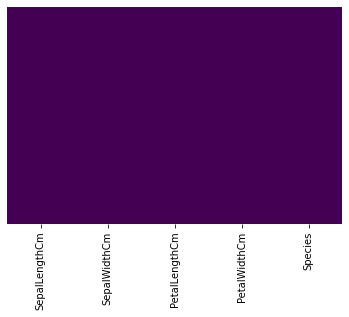

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Visualizing data

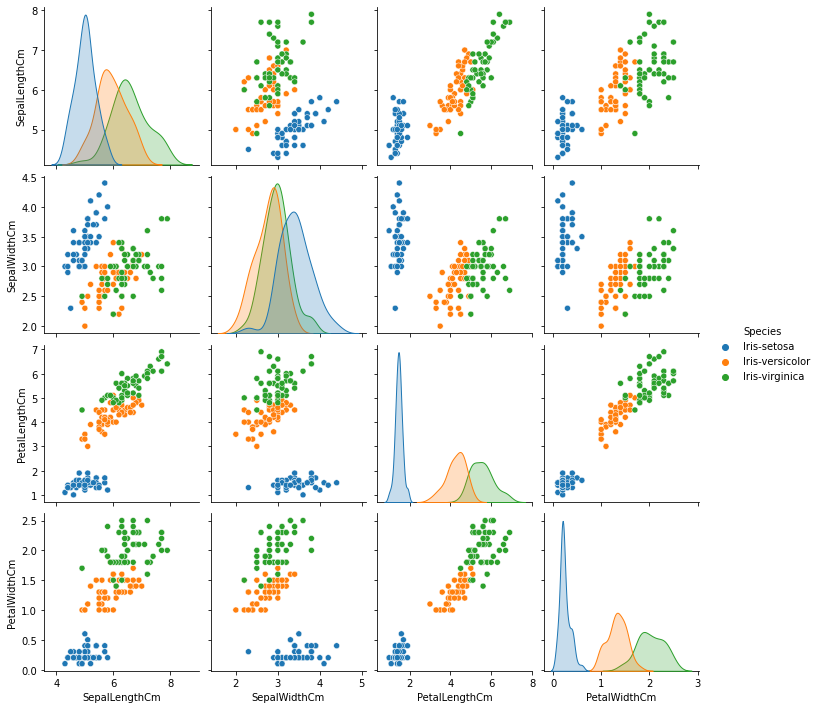

In [10]:
sns.pairplot(df, hue='Species')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

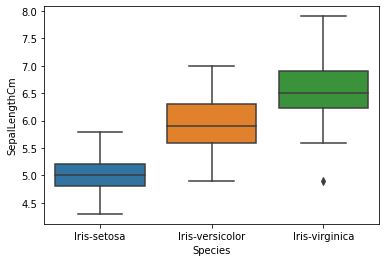

In [11]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

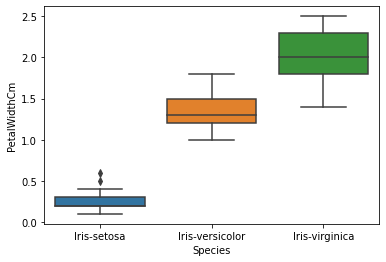

In [12]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

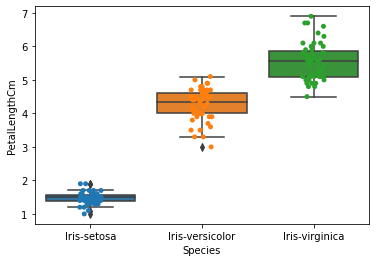

In [13]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data=df)
sns.stripplot(x = 'Species', y = 'PetalLengthCm', jitter=True, edgecolor = 'gray', data=df)

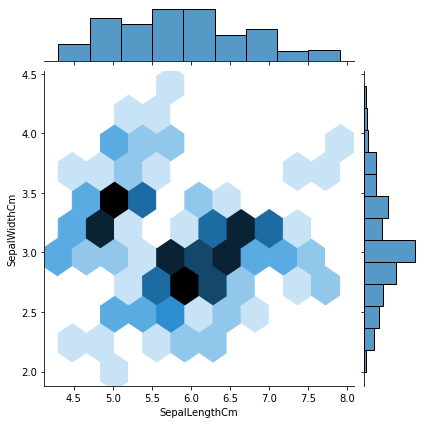

In [14]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, kind='hex')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting data

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100)

## Building Decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
prediction = model.predict(X_test)

## Checking the accuracy

In [22]:
from sklearn import metrics

In [23]:
metrics.accuracy_score(y_test, prediction)

0.9555555555555556

## Classification report and confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Plotting

In [26]:
from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier()

In [28]:
clf = clf.fit(X, y)

In [29]:
fname = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']
cname = ['Setosa', 'Versicolor', 'Virginica']

[Text(558.0, 747.4499999999999, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(472.15384615384613, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(643.8461538461538, 611.55, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(343.38461538461536, 475.65, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(171.69230769230768, 339.74999999999994, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(85.84615384615384, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(257.53846153846155, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(515.0769230769231, 339.74999999999994, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(429.23076923076917

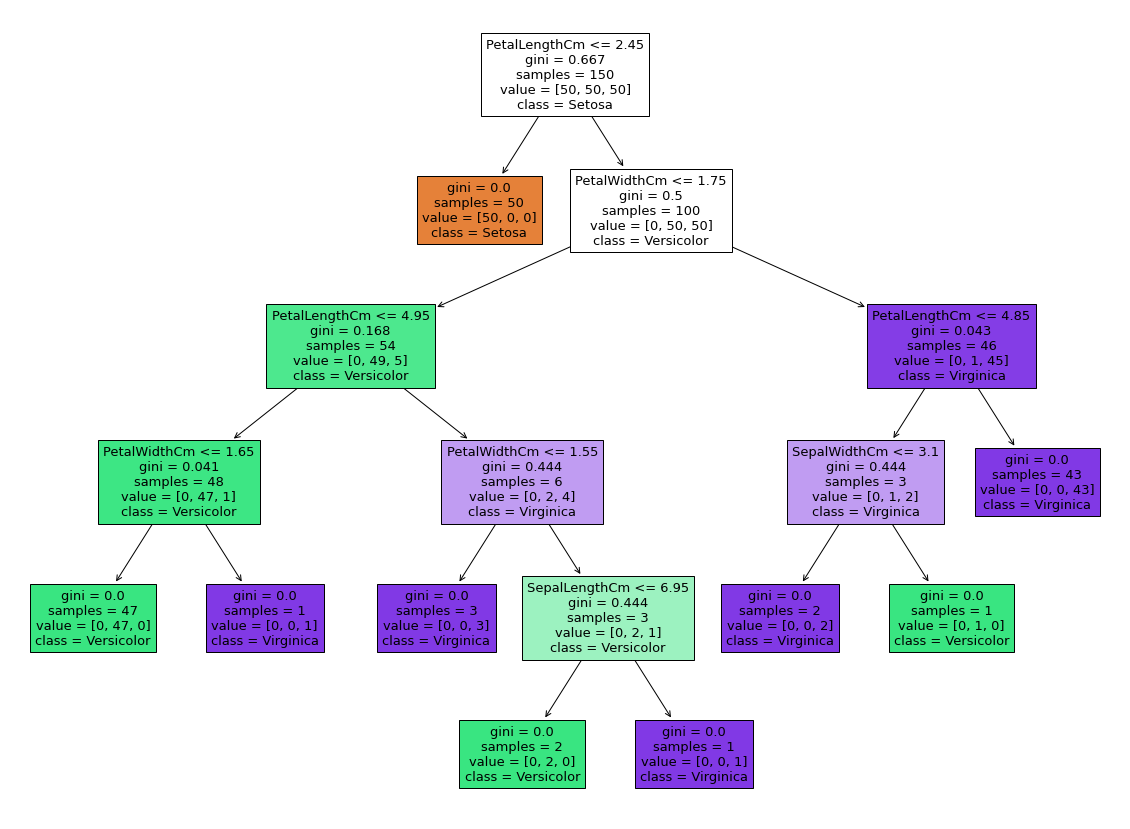

In [30]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=fname, class_names=cname, filled=True)